In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [9]:
src = pathlib.Path().cwd().parent.parent / 'data' / 'processed'

In [10]:
no_case = pd.read_csv(src / 'no-case' / 'no-case.csv', index_col=0)
no_death = pd.read_csv(src / 'no-death' / 'no-death.csv', index_col=0)
no_test = pd.read_csv(src / 'no-test' / 'no-test.csv', index_col=0)
no_positive = pd.read_csv(src / 'no-positive' / 'no-positive.csv', index_col=0)
no_admission = pd.read_csv(src / 'no-admission' / 'no-admission.csv', index_col=0)

In [11]:
no_case.index = pd.to_datetime(no_case.index)
no_case.no_case = no_case.no_case.astype('float')

no_death.index = pd.to_datetime(no_death.index)
no_death.no_death = no_death.no_death.astype('float')

no_test.index = pd.to_datetime(no_test.index)
no_test.no_test = no_test.no_test.astype('float')

no_positive.index = pd.to_datetime(no_positive.index)
no_positive.no_positive = no_positive.no_positive.astype('float')

no_admission.index = pd.to_datetime(no_admission.index)
no_admission.no_admission = no_admission.no_admission.astype('float')

In [12]:
# no_case.info()
# no_death.info()
# no_test.info()
# no_positive.info()
no_admission

,no_admission,no_admission_ppop,no_admission_rollmean7d,no_admission_ppop_rollmean7d,no_admission_cumsum,no_admission_ppop_cumsum
2021-05-27,1.0,0.011,NaN,NaN,1.0,0.011
2021-05-28,0.0,0.000,NaN,NaN,1.0,0.011
2021-05-29,0.0,0.000,NaN,NaN,1.0,0.011
2021-05-30,1.0,0.011,NaN,NaN,2.0,0.022
2021-05-31,0.0,0.000,NaN,NaN,2.0,0.022
...,...,...,...,...,...,...
2021-08-17,78.0,0.867,107.000000,1.189714,4863.0,54.071
2021-08-18,65.0,0.723,95.857143,1.065857,4928.0,54.794
2021-08-19,38.0,0.423,82.428571,0.916571,4966.0,55.217
2021-08-20,12.0,0.133,67.285714,0.748143,4978.0,55.350


Text(0.5, 1.0, 'no_death_rollmean7d')

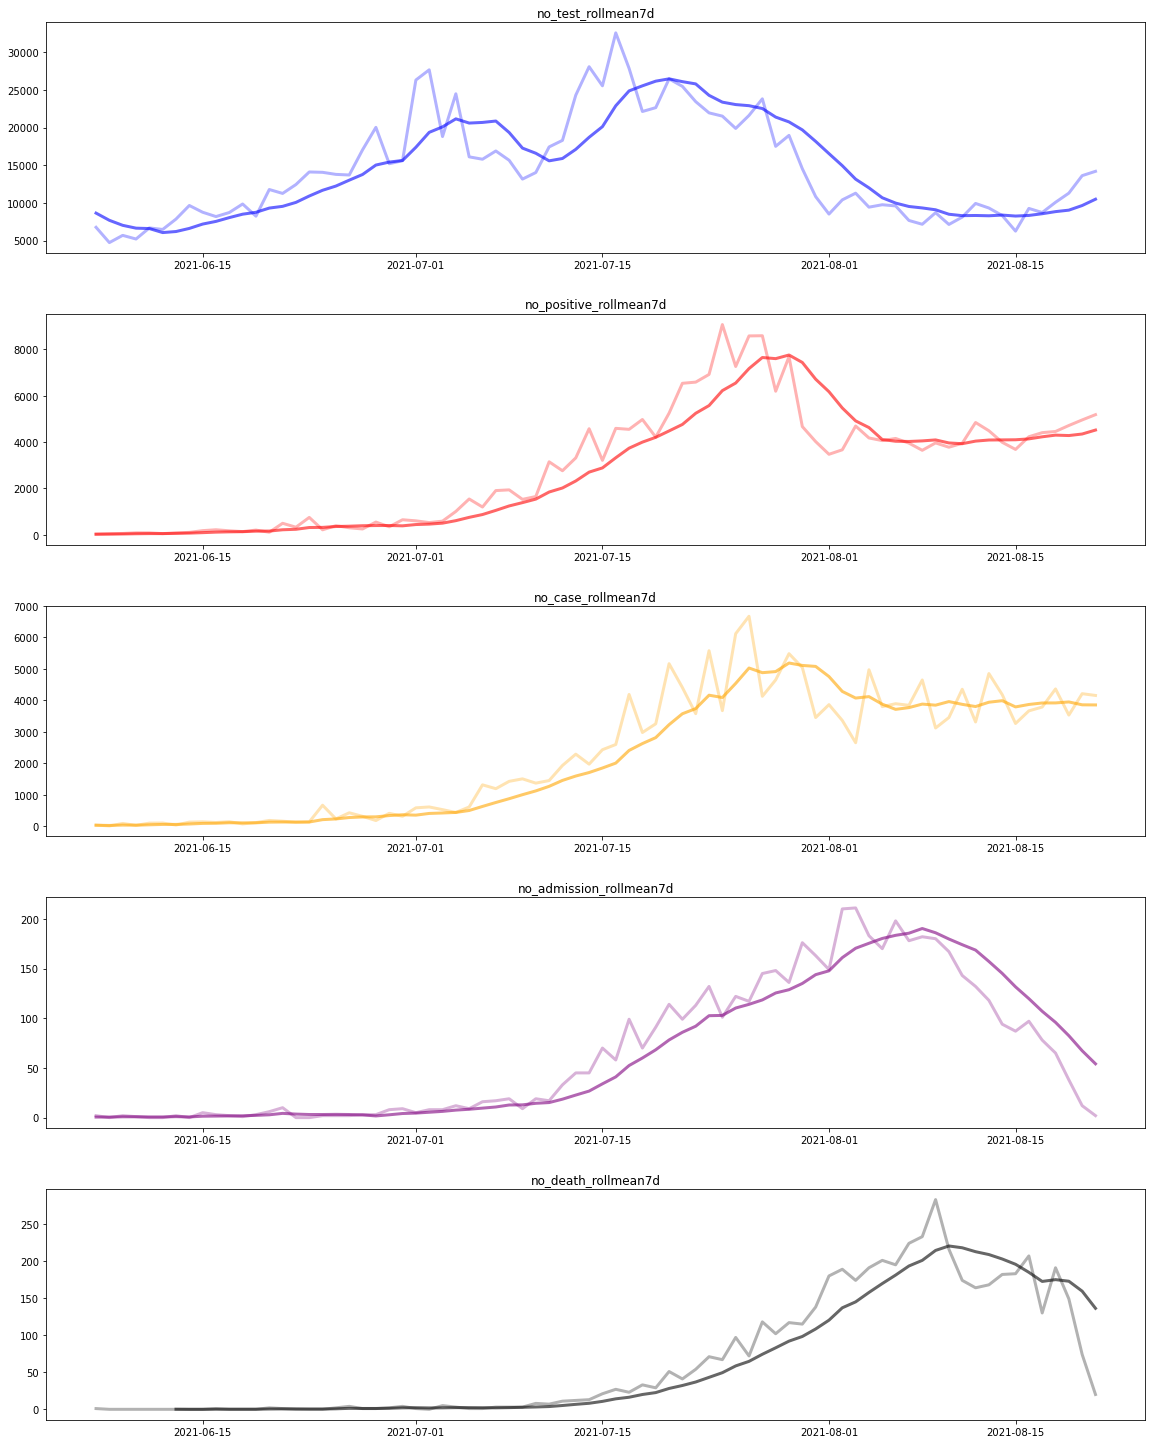

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(16, 20))
plt.tight_layout(h_pad=4)

dc = no_case.loc['2021-06-07':'2021-08-21']
dt = no_test.loc['2021-06-07':'2021-08-21']
dd = no_death.loc['2021-06-07':'2021-08-21']
dp = no_positive.loc['2021-06-07':'2021-08-21']
da = no_admission.loc['2021-06-07':'2021-08-21']

ax[0].plot(dt.index, dt.no_test_rollmean7d, linewidth=3, color='blue', alpha=0.6)
ax[0].plot(dt.index, dt.no_test, linewidth=3, color='blue', alpha=0.3)
ax[0].set_title('no_test_rollmean7d')
ax[1].plot(dp.index, dp.no_positive_rollmean7d, linewidth=3, color='red', alpha=0.6)
ax[1].plot(dp.index, dp.no_positive, linewidth=3, color='red', alpha=0.3)
ax[1].set_title('no_positive_rollmean7d')
ax[2].plot(dc.index, dc.no_case_rollmean7d, linewidth=3, color='orange', alpha=0.6)
ax[2].plot(dc.index, dc.no_case, linewidth=3, color='orange', alpha=0.3)
ax[2].set_title('no_case_rollmean7d')
ax[3].plot(da.index, da.no_admission_rollmean7d, linewidth=3, color='purple', alpha=0.6)
ax[3].plot(da.index, da.no_admission, linewidth=3, color='purple', alpha=0.3)
ax[3].set_title('no_admission_rollmean7d')
ax[4].plot(dd.index, dd.no_death_rollmean7d, linewidth=3, color='black', alpha=0.6)
ax[4].plot(dd.index, dd.no_death, linewidth=3, color='black', alpha=0.3)
ax[4].set_title('no_death_rollmean7d')
# ax.set_ylabel('Số ca mới')
# ax.set_ylim([0, 7500])
# ax.set_xlabel('Ngày')
# ax.set_xticks(no_case.index)
# ax.tick_params(axis='x', labelrotation=90)

Text(153.0, 0.5, 'no_death')

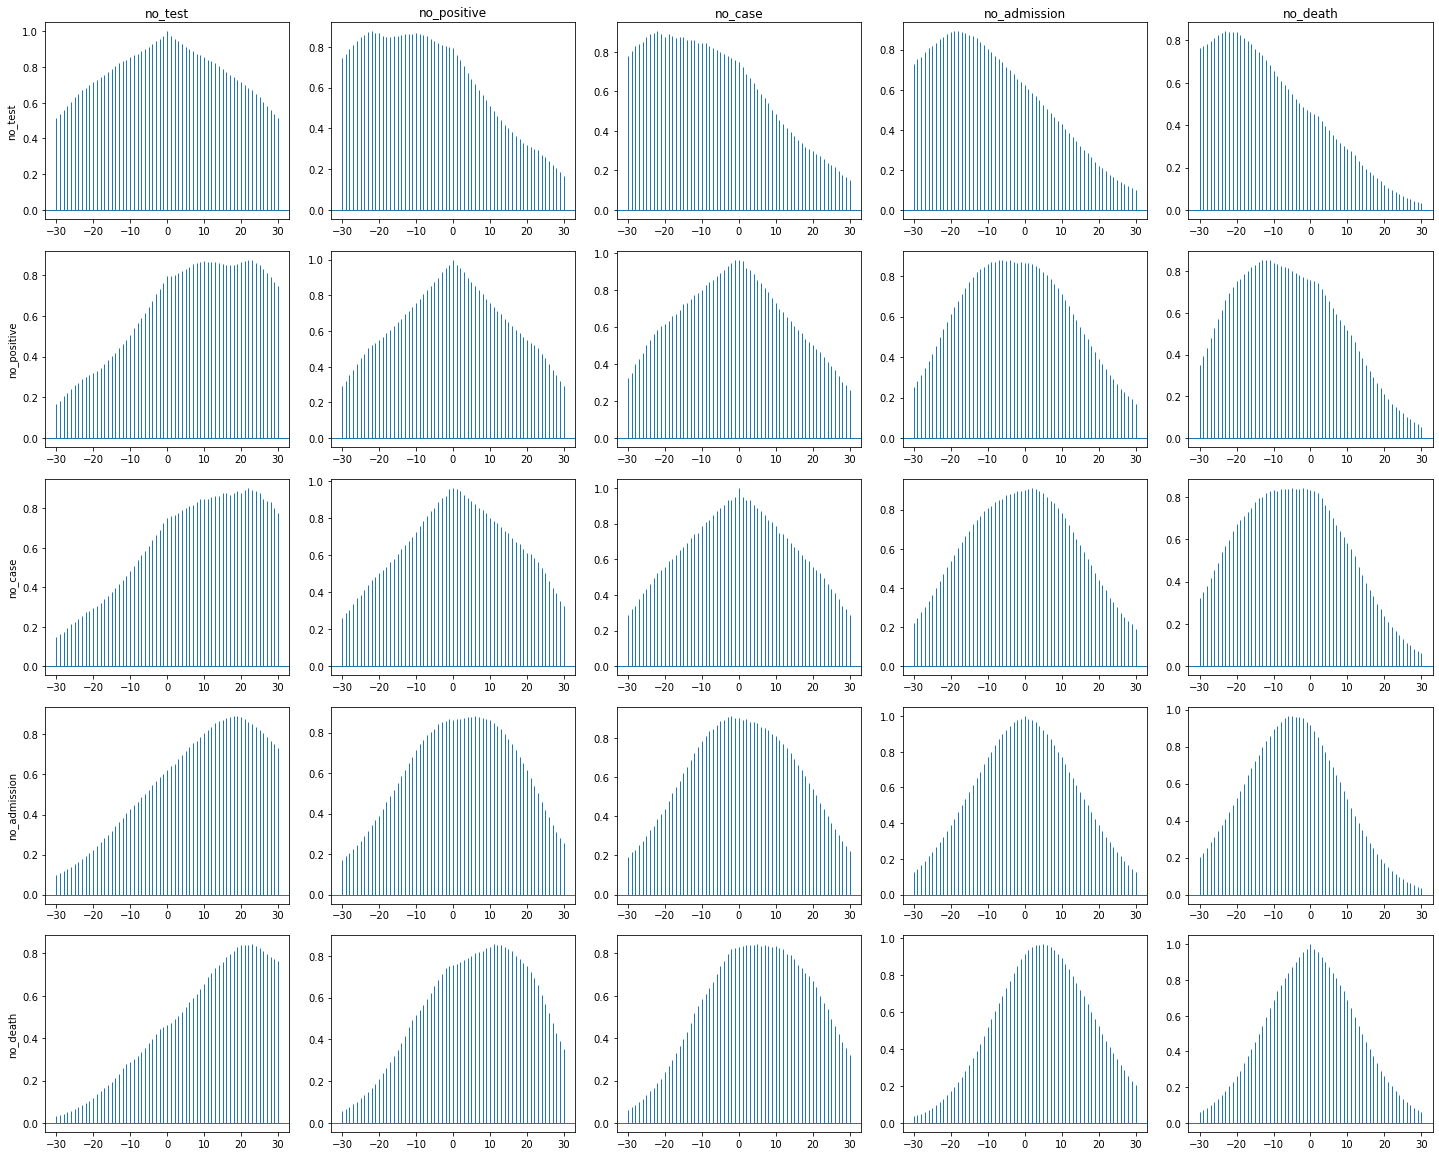

In [16]:
maxlags = 30
lw = 1

fig, ax = plt.subplots(5, 5, figsize=(20, 16))
plt.tight_layout()

ax[0, 0].xcorr(dt.no_test, dt.no_test, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[0, 1].xcorr(dt.no_test, dp.no_positive, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[0, 2].xcorr(dt.no_test, dc.no_case, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[0, 3].xcorr(dt.no_test, da.no_admission, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[0, 4].xcorr(dt.no_test, dd.no_death, usevlines=True, maxlags=maxlags, normed=True,lw=lw)


ax[1, 0].xcorr(dp.no_positive, dt.no_test, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[1, 1].xcorr(dp.no_positive, dp.no_positive, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[1, 2].xcorr(dp.no_positive, dc.no_case, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[1, 3].xcorr(dp.no_positive, da.no_admission, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[1, 4].xcorr(dp.no_positive, dd.no_death, usevlines=True, maxlags=maxlags, normed=True,lw=lw)

ax[2, 0].xcorr(dc.no_case, dt.no_test, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[2, 1].xcorr(dc.no_case, dp.no_positive, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[2, 2].xcorr(dc.no_case, dc.no_case, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[2, 3].xcorr(dc.no_case, da.no_admission, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[2, 4].xcorr(dc.no_case, dd.no_death, usevlines=True, maxlags=maxlags, normed=True,lw=lw)

ax[3, 0].xcorr(da.no_admission, dt.no_test, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[3, 1].xcorr(da.no_admission, dp.no_positive, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[3, 2].xcorr(da.no_admission, dc.no_case, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[3, 3].xcorr(da.no_admission, da.no_admission, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[3, 4].xcorr(da.no_admission, dd.no_death, usevlines=True, maxlags=maxlags, normed=True,lw=lw)

ax[4, 0].xcorr(dd.no_death, dt.no_test, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[4, 1].xcorr(dd.no_death, dp.no_positive, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[4, 2].xcorr(dd.no_death, dc.no_case, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[4, 3].xcorr(dd.no_death, da.no_admission, usevlines=True, maxlags=maxlags, normed=True,lw=lw)
ax[4, 4].xcorr(dd.no_death, dd.no_death, usevlines=True, maxlags=maxlags, normed=True,lw=lw)

ax[0, 0].set_title('no_test')
ax[0, 1].set_title('no_positive')
ax[0, 2].set_title('no_case')
ax[0, 3].set_title('no_admission')
ax[0, 4].set_title('no_death')
ax[0, 0].set_ylabel('no_test')
ax[1, 0].set_ylabel('no_positive')
ax[2, 0].set_ylabel('no_case')
ax[3, 0].set_ylabel('no_admission')
ax[4, 0].set_ylabel('no_death')